Margin: 0.62787780090277
Support Vectors:
Support Vector 1: [ 0.16405235 -1.19984279], Label = -1.0
Support Vector 2: [-0.62126202  0.6408932 ], Label = -1.0
Support Vector 3: [-0.06722079 -0.13064123], Label = -1.0
Support Vector 4: [0.55144703 0.17998206], Label = 1.0
Support Vector 5: [-0.01389785  1.38725972], Label = 1.0
Support Vector 6: [ 0.78685372 -0.1262826 ], Label = 1.0


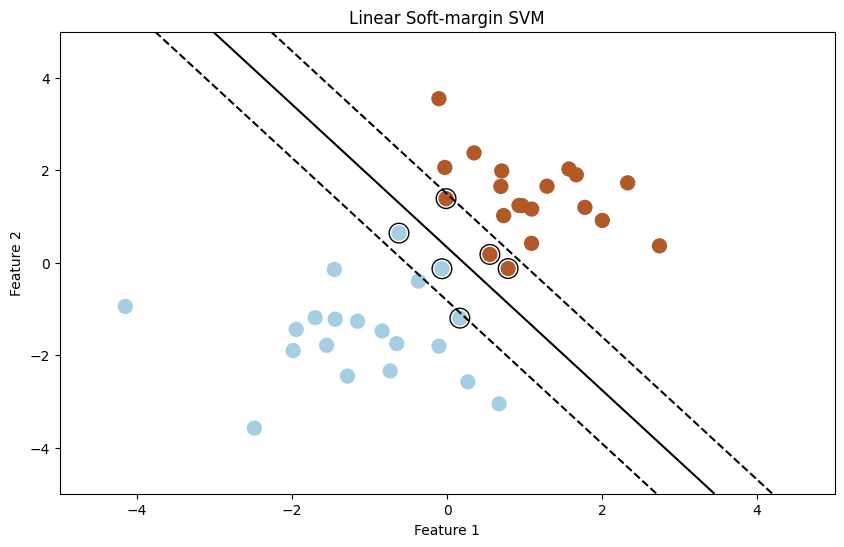

In [1]:
import numpy as np
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.vstack([np.random.randn(20, 2) - [1.6, 1.6], np.random.randn(20, 2) + [1.6, 1.6]])
y = np.hstack([-np.ones(20), np.ones(20)])

# Number of data points
N = X.shape[0]

# Soft-margin SVM parameter C
C = 0.7  # Regularization parameter

# Gram matrix (each entry = y_i y_j x_i^T x_j)
Gtmp = np.dot(X, X.T) * np.outer(y, y)
G = cvxopt.matrix(Gtmp)
q = cvxopt.matrix(-np.ones(N))

# Constraints:
# 1. 0 <= alpha_i <= C
M = cvxopt.matrix(np.vstack([-np.eye(N), np.eye(N)]))  # -alpha <= 0 and alpha <= C
h = cvxopt.matrix(np.hstack([np.zeros(N), np.ones(N) * C]))

# 2. Sum of alpha_i * y_i = 0
A = cvxopt.matrix(y, (1, N))
d = cvxopt.matrix(0.0)

# Solve the quadratic programming problem
cvxopt.solvers.options['show_progress'] = False
solution = cvxopt.solvers.qp(G, q, M, h, A, d)

# Extract the Lagrange multipliers
alpha_optimal = np.array(solution['x']).flatten()

# Find the support vectors
support_vector_indices = np.where((alpha_optimal > 1e-5) & (alpha_optimal < C))[0]
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]

# Compute the weight vector w
w = np.sum((alpha_optimal * y).reshape(-1, 1) * X, axis=0)

# Compute the bias b using the support vectors
b = np.mean(support_vector_labels - np.dot(support_vectors, w))

# Calculate the margin
margin = 1 / np.linalg.norm(w)

# Print results
print("Margin:", margin)
print("Support Vectors:")
for i in range(len(support_vector_indices)):
    idx = support_vector_indices[i]
    print(f"Support Vector {i + 1}: {X[idx]}, Label = {y[idx]}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Soft-margin SVM')
plt.show()
